# Laboratorio 6 Analítica Redes Sociales
#### Juan Galicia 20298 Stefan Quintana 191630

Se importan las librerias y se leen los archivos proporcionados por web scrapping

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pattern.en import sentiment
import nltk
import re
import emoji
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.util import ngrams
from unidecode import unidecode

In [10]:
trafico = pd.read_csv("traficogt.csv")
bernardo = pd.read_csv("bernardoArevalo.csv")
sandra = pd.read_csv("sandraTorres.csv")

## Problema 1

## Problema 2

¿La opinión pública de cada uno de los candidatos es en su mayoría positiva o
negativa? Puede usar comentarios para responderse esta pregunta. ¿Encontró algún
influencer?¿Cómo describiría la estructura de la red de cada uno de los candidatos, centralizada o
distribuida?¿Fue durante su campaña la red social un aspecto importante para influir en la decisión
de los guatemaltecos?

In [10]:
bernardo.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1702109621899407575,1702109621899407575,https://twitter.com/eltuitdehoy_/status/170210...,2023-09-13 23:58:52+00:00,"{'id': 46561608, 'id_str': '46561608', 'url': ...",es,@AnonGTReloaded @msemillagt @BArevalodeLeon ja...,0,0,...,NaN,NaN,NaN,1.702089e+18,"{'id': 1419402501212811265, 'username': 'AnonG...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1702109505947865192,1702109505947865192,https://twitter.com/totitafuentes/status/17021...,2023-09-13 23:58:24+00:00,"{'id': 1005627722, 'id_str': '1005627722', 'ur...",es,@ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...,0,1,...,NaN,NaN,NaN,1.702056e+18,"{'id': 291888009, 'username': 'ASIERVERA', 'di...","<a href=""http://twitter.com/#!/download/ipad"" ...",http://twitter.com/#!/download/ipad,Twitter for iPad,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",2,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1702109134387134664,1702109134387134664,https://twitter.com/Fernand0483/status/1702109...,2023-09-13 23:56:55+00:00,"{'id': 1512621569834688513, 'id_str': '1512621...",es,@VicZacariasGT @soy_502 @BArevalodeLeon @msemi...,0,0,...,NaN,NaN,NaN,1.701799e+18,"{'id': 84055675, 'username': 'VicZacariasGT', ...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1702108943495926143,1702108943495926143,https://twitter.com/MaxTiger502/status/1702108...,2023-09-13 23:56:10+00:00,"{'id': 891058586, 'id_str': '891058586', 'url'...",es,@Igor_Bitkov No le sigan el juego a este ruso ...,1,0,...,NaN,NaN,NaN,1.701898e+18,"{'id': 707086237753090048, 'username': 'Igor_B...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet


In [12]:
bernardo.dtypes

Unnamed: 0            int64
id                    int64
id_str                int64
url                  object
date                 object
user                 object
lang                 object
rawContent           object
replyCount            int64
retweetCount          int64
likeCount             int64
quoteCount            int64
conversationId        int64
hashtags             object
cashtags             object
mentionedUsers       object
links                object
viewCount           float64
retweetedTweet       object
quotedTweet          object
place                object
coordinates         float64
inReplyToTweetId    float64
inReplyToUser        object
source               object
sourceUrl            object
sourceLabel          object
media                object
_type                object
dtype: object

In [11]:
bernardo2=bernardo.iloc[:,1:]
bernardo2["date"] = pd.to_datetime(bernardo["date"])
sandra2=sandra.iloc[:,1:]
sandra2["date"] = pd.to_datetime(sandra["date"])

In [107]:
nltk_stopwords = set(stopwords.words('english'))

stop_words = set(stopwords.words('spanish'))  # Cambia 'spanish' al idioma que desees si no estás trabajando en español

def limpiar_texto(tweet):
    # Convertir el texto a minúsculas
    tweet = tweet.lower()
    
    # Eliminar menciones completas (texto después del @)
    tweet = re.sub(r'@\S+', '', tweet)
    
    # Eliminar caracteres especiales, URLs y números usando expresiones regulares
    tweet = re.sub(r'[@#\'\d]', '', tweet)  # Eliminar @, #, apóstrofes y números
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)  # Eliminar URLs
    
    # Eliminar todos los emoticones
    tweet = emoji.replace_emoji(tweet, replace='')
    
    # Eliminar signos de puntuación
    tweet = re.sub(r'[^\w\s]', '', tweet)
    
    # Tokenizar el texto y eliminar stopwords
    tokens = nltk.word_tokenize(tweet)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in nltk_stopwords]
    
    # Unir tokens limpios en un solo texto
    tweet = ' '.join(tokens)
    
    tweet = unidecode(tweet)
    
    palabras_a_eliminar = ['traficogt', 'ahora', 'zona', "via", "avenida","si","no", "calle","solo", "ruta","paso","guatemala","presidente","predente","pueblo","ser"]  # Agrega las palabras que deseas eliminar
    
    # Eliminar las palabras de la lista
    for palabra in palabras_a_eliminar:
        tweet = tweet.replace(palabra, '')
    
    return tweet

In [108]:
bernardo2['Tweets_limpios'] = bernardo2['rawContent'].apply(limpiar_texto)

In [109]:
bernardo2.rawContent

0       @AnonGTReloaded @msemillagt @BArevalodeLeon ja...
1       @ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...
2       Paciente de 39 años, dolor lumbar de 1 año tra...
3       @VicZacariasGT @soy_502 @BArevalodeLeon @msemi...
4       @Igor_Bitkov No le sigan el juego a este ruso ...
                              ...                        
4207    #AHORA Accidente de tránsito en el bulevar La ...
4208    #AHORA Accidente de tránsito en el bulevar La ...
4209    #traficogt patrulla empotrada en vía del Trans...
4210    @amilcarmontejo #TraficoGT anormal después del...
4211    Desfile navideño obstruyendo el paso a los res...
Name: rawContent, Length: 4212, dtype: object

In [110]:
bernardo2.Tweets_limpios

0       jajajajajajajaja pisen deje hartos tanta igran...
1       dos veces repitio actuando margen ley seguro t...
2       paciente as dolor lumbar a tras caida hizo seo...
3                          compa alucina puro net pareces
4       gan juego ruso invasor enero solicitamos retir...
                              ...                        
4207     accidente tranto bulevar madre    das materia...
4208     accidente tranto bulevar madre    das materia...
4209                       patrulla empotrada  transmetro
4210                         armal despues estadio rojos 
4211    desfile navide obstruyendo  redentes  juan cha...
Name: Tweets_limpios, Length: 4212, dtype: object

In [111]:
sandra2['Tweets_limpios'] = sandra2['rawContent'].apply(limpiar_texto)

In [112]:
sandra2["Tweets_limpios"]

0                  mentiroso giamattei baldetti minuscula
1       dedonde van sacar mil supuestos votos primera ...
2       national race walking championship amp youth c...
3                             sues net banalos tomas agua
4       estupido cegado caciques impide ver bajo nivel...
                              ...                        
5779     salir  lourdes hacia clzd paz aiiiiuuuudaaaa ...
5780     dos buses extraurbas colionaron     das mater...
5781     dos buses extraurbas colionaron     das mater...
5782    bilidad realizan trabajos cambio loza   recomi...
5783     manifestacion bloquea  petapa   frente usac  ...
Name: Tweets_limpios, Length: 5784, dtype: object

In [113]:
sandra2["rawContent"]

0       @bernardosilvagt @BArevalodeLeon @DrGiammattei...
1       @_awskl @mjcabrerar @BArevalodeLeon @TSEGuatem...
2       The 2023 National Race Walking Championship &a...
3       @Palomin17772524 @mjcabrerar @BArevalodeLeon @...
4       @ASolaresM @Mike051270 @BArevalodeLeon Otro es...
                              ...                        
5779    @amilcarmontejo @PMTMuniGuate #traficogt para ...
5780    #AHORA Dos buses extraurbanos colisionaron en ...
5781    #AHORA Dos buses extraurbanos colisionaron en ...
5782    Viabilidad | Se realizan trabajos de cambio de...
5783    #AHORA Manifestación bloquea la avenida Petapa...
Name: rawContent, Length: 5784, dtype: object

In [114]:
conteoB = Counter(' '.join(bernardo2["Tweets_limpios"]).split())
conteoS = Counter(' '.join(sandra2["Tweets_limpios"]).split())
nB = conteoB.most_common(20)
nS = conteoS.most_common(20)
print("Palabras comunes en tweets Bernardo:", nB)
print("Palabras comunes en tweets Sandra:", nS)

Palabras comunes en tweets Bernardo: [('electo', 220), ('arevalo', 196), ('hoy', 183), ('a', 169), ('trancion', 163), ('mp', 161), ('corruptos', 146), ('proceso', 145), ('golpistas', 133), ('q', 131), ('van', 127), ('elecciones', 127), ('das', 123), ('tranto', 122), ('materiales', 119), ('semilla', 118), ('hacer', 116), ('va', 112), ('gobier', 110), ('puede', 109)]
Palabras comunes en tweets Sandra: [('a', 308), ('arevalo', 233), ('electo', 224), ('hoy', 204), ('corruptos', 198), ('va', 180), ('elecciones', 179), ('hacia', 176), ('tranto', 174), ('usted', 163), ('mp', 162), ('trancion', 161), ('proceso', 160), ('accidente', 155), ('semilla', 153), ('golpistas', 152), ('trafico', 148), ('van', 138), ('hacer', 137), ('gobier', 137)]


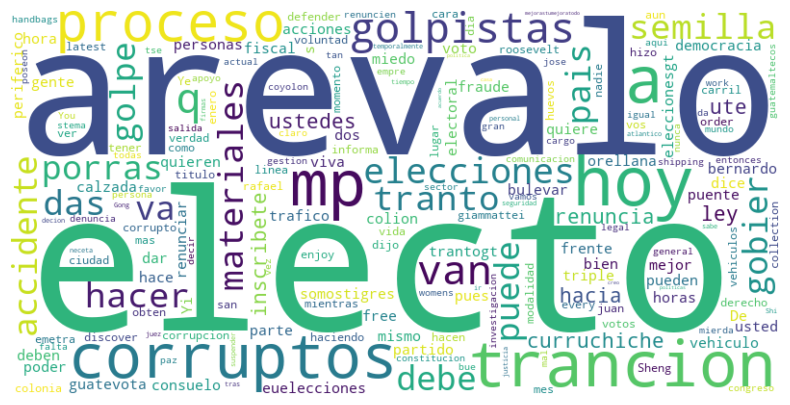

In [115]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conteoB)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

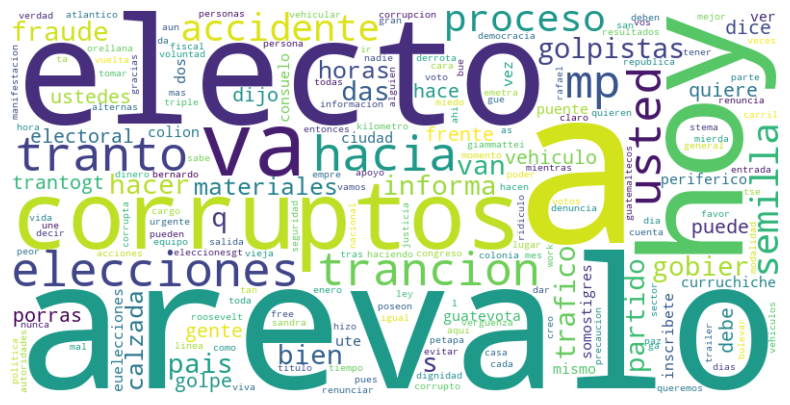

In [116]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(conteoS)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [117]:
bernardo2.isna().sum()

id                     0
id_str                 0
url                    0
date                   0
user                   0
lang                   0
rawContent             0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
hashtags               0
cashtags               0
mentionedUsers         0
links                  0
viewCount             77
retweetedTweet      4211
quotedTweet         4030
place               4151
coordinates         4212
inReplyToTweetId    1909
inReplyToUser       1789
source                 0
sourceUrl              0
sourceLabel            0
media                  0
_type                  0
Tweets_limpios         0
dtype: int64